In [9]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('dataset_final_para_modelo.csv', decimal=',')
df.head()

,latitude,longitude,data,dia_semana,mes,is_weekend,hora,Sinistro,Chuva,tipo_via_num,tp_veiculo_bicicleta,tp_veiculo_caminhao,tp_veiculo_motocicleta,tp_veiculo_nao_disponivel,tp_veiculo_onibus,tp_veiculo_outros,tp_veiculo_automovel
0,-22.370454,-49.051246,2025-09-01,0,9,0,2,0,0,1.0,0,0,0,0,0,0,0
1,-22.371995,-49.025240,2025-08-22,4,8,0,11,0,0,0.0,0,0,0,0,0,0,0
2,-22.340207,-49.114017,2025-12-02,1,12,0,23,0,0,0.0,0,0,0,0,0,0,0
3,-22.332466,-49.056129,2024-04-23,1,4,0,17,0,1,0.0,0,0,0,0,0,0,0
4,-22.323449,-49.058255,2023-07-26,2,7,0,7,1,0,0.0,0,0,0,0,0,0,0


In [11]:
df_numerical = df[['latitude', 'longitude', 'hora', 'Sinistro', 'Chuva', 
                   'tipo_via_num', 'dia_semana', 'mes']]

# Passo 3: Verificar se há valores ausentes (NaN)
print("Valores ausentes antes da imputação:")
print(df_numerical.isnull().sum())

# Passo 4: Imputar os valores ausentes (substituindo por média)
imputer = SimpleImputer(strategy='mean')
df_numerical_imputed = imputer.fit_transform(df_numerical)

# Verificando se ainda há valores ausentes após imputação
print("\nValores ausentes após a imputação:")
print(np.isnan(df_numerical_imputed).sum())

# Passo 5: Normalizar os dados (para t-SNE)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical_imputed)

Valores ausentes antes da imputação:
latitude         0
longitude        0
hora             0
Sinistro         0
Chuva            0
tipo_via_num    16
dia_semana       0
mes              0
dtype: int64

Valores ausentes após a imputação:
0


In [14]:
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_scaled)
df_tsne = pd.DataFrame(df_tsne, columns=['tSNE_1', 'tSNE_2'])
df_tsne['Sinistro'] = df['Sinistro']

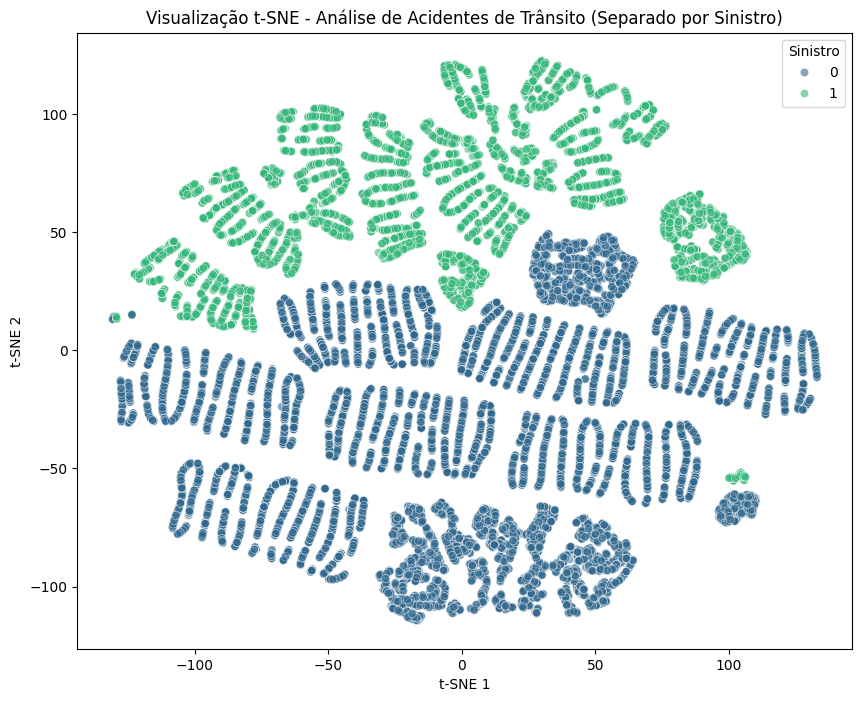

In [16]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='tSNE_1', y='tSNE_2', hue='Sinistro', data=df_tsne, palette='viridis', alpha=0.6)
plt.title('Visualização t-SNE - Análise de Acidentes de Trânsito (Separado por Sinistro)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Sinistro')
plt.show()